## Using Image to Visualize CNN Network

Convolutional neural network (CNN) is the state-of-art technique for analyzing multidimensional signals such as images. There are a lot of different libraries available to allow us use this technique in image processing, but these libraries seperate us from having full control of the neural networks. So understanding the implementing process is crucial and will be useful in the actual usage of the CNN. 

In this notebook, I am going to follow the guidelines by Ahmed Gad and [his post](https://www.kdnuggets.com/2018/04/building-convolutional-neural-network-numpy-scratch.html). However, the dataset I am using is the Celeb-A dataset which can be found in [here](https://www.kaggle.com/jessicali9530/celeba-dataset). 

## 1. Guidelines for building CNN

In the tutorial by Ahmed Gad, the CNN is created only by NumPy library with three layers: convolution, ReLU, and max pooling. The steps involved are as follows:

1. Reading the input image.
2. Preparing filters.
3. Conv layer: Convolving each filter wih the input image.
4. ReLu layer: Applying ReLU activation function on the feature maps (out of conv layer)
5. Max Pooling layer: Applying the pooling operation on the output of ReLU layer.

### (1) Reading input image

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color
from skimage import io

In [74]:
cd="C:\\Users\\xil14\\Desktop\\Zora\\Machine Learning Projects\\Facial Recognition\\Part1\\"
img=mpimg.imread(cd + '182640.jpg')

In [75]:
img.shape

(207, 200, 3)

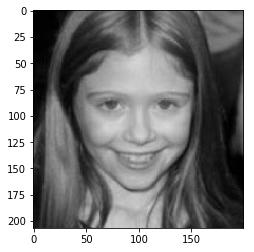

In [76]:
# converting the image to grayscale
img1 = color.rgb2gray(img)
plt.imshow(img1,cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

### (2) Preparing filters

The filters bank for the first conv layer (conv) is a zero array created according to the number of filters and size of each filter. For 2D image such as greysclae, we typically have filter = 2 because of the image does not have depth. If the image is RGB with three channels, the filter size should be 3. 

In [77]:
l1_filter = np.zeros((2,3,3))
l1_filter[0,:,:] = np.array([[[-1,0,1],
                              [-1,0,1],
                              [-1,0,1]]])
l1_filter[1,:,:] = np.array([[[1,1,1],
                              [0,0,0],
                              [-1,-1,-1]]])

### (3) Conv Layer

After preparing the filters, next is to convolve te input image. To convolve the images with filters bank using using a function called conv. The **conv** function is defined in the following, thanks to the credit of Ahmed.

In [78]:
import numpy
def conv(img, conv_filter):  
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Check if number of image channels matches the filter depth.  
        if img.shape[-1] != conv_filter.shape[-1]:  
            print("Error: Number of channels in both image and filter must match.")  
            sys.exit()  
    if conv_filter.shape[1] != conv_filter.shape[2]: # Check if filter dimensions are equal.  
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')  
        sys.exit()  
    if conv_filter.shape[1]%2==0: # Check if filter diemnsions are odd.  
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')  
        sys.exit()  
   
     # An empty feature map to hold the output of convolving the filter(s) with the image.  
    feature_maps = numpy.zeros((img.shape[0]-conv_filter.shape[1]+1,   
                                 img.shape[1]-conv_filter.shape[1]+1,   
                                 conv_filter.shape[0]))  
   
     # Convolving the image by the filter(s).  
    for filter_num in range(conv_filter.shape[0]):  
         
        print("Filter ", filter_num + 1)  
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank. 
         
        """  
         Checking if there are mutliple channels for the single filter. 
         If so, then each channel will convolve the image. 
         The result of all convolutions are summed to return a single feature map. 
        """  
        if len(curr_filter.shape) > 2:  
             
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.               
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.  
                conv_map = conv_map + conv_(img[:, :, ch_num],   
                                   curr_filter[:, :, ch_num])  
         
        else: # There is just a single channel in the filter.  
             conv_map = conv_(img, curr_filter)  
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps # Returning all feature maps.

In [79]:
def conv_(img, conv_filter):  
    filter_size = conv_filter.shape[0]  
    result = numpy.zeros((img.shape))  
    #Looping through the image to apply the convolution operation.  
    for r in numpy.uint16(numpy.arange(filter_size/2,   
                            img.shape[0]-filter_size/2-2)):  
        for c in numpy.uint16(numpy.arange(filter_size/2, img.shape[1]-filter_size/2-2)):  
            #Getting the current region to get multiplied with the filter.  
            curr_region = img[r:r+filter_size, c:c+filter_size]  
            #Element-wise multipliplication between the current region and the filter.  
            curr_result = curr_region * conv_filter  
            conv_sum = numpy.sum(curr_result) #Summing the result of multiplication.  
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.  
               
    #Clipping the outliers of the result matrix.  
    final_result = result[numpy.uint16(filter_size/2):result.shape[0]-numpy.uint16(filter_size/2),   
                           numpy.uint16(filter_size/2):result.shape[1]-numpy.uint16(filter_size/2)]  
    return final_result  

In [80]:
# applying the first convolutional neural network

conv1 = conv(img1, l1_filter)
print(len(img.shape))
print(len(l1_filter.shape))

Filter  1
Filter  2
3
3


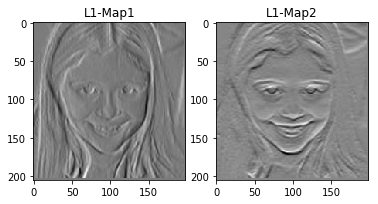

In [81]:
# Results after the Conv1
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(conv1[:,:,0],cmap=plt.get_cmap('gray'))
plt.title('L1-Map1')
f.add_subplot(1,2, 2)
plt.imshow(conv1[:,:,1],cmap=plt.get_cmap('gray'))
plt.title('L1-Map2')
plt.show(block=True)

### (4) ReLU Layer

The ReLU layer is the similar to the Recitifier from the ANN. This layer will applies ReLU activation function over each feature map returned by the conv layer. It will loop though each element in the feature map and return the original value in the feature map if it is larger than 0. Otherwise, it will return 0. It is done in the following function called **relu**:

In [82]:
def relu(feature_map):  
    #Preparing the output of the ReLU activation function.  
    relu_out = numpy.zeros(feature_map.shape)  
    for map_num in range(feature_map.shape[-1]):  
        for r in numpy.arange(0,feature_map.shape[0]):  
            for c in numpy.arange(0, feature_map.shape[1]):  
                relu_out[r, c, map_num] = max(feature_map[r, c, map_num], 0)
    return relu_out

In [83]:
relu1 = relu(conv1)

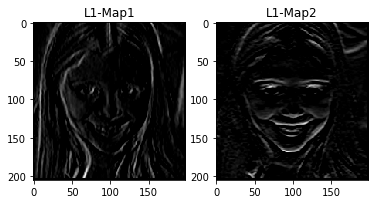

In [84]:
# Results after the Relu
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(relu1[:,:,0],cmap=plt.get_cmap('gray'))
plt.title('L1-Map1')
f.add_subplot(1,2, 2)
plt.imshow(relu1[:,:,1],cmap=plt.get_cmap('gray'))
plt.title('L1-Map2')
plt.show(block=True)

### (5) Max Pooling Layer

The max pooling payer accepts the output of the ReLu layer and applies the max pooling operation. Basically, max pooling will takes three inputs which are the output of the ReLU layer, pooling mask size and stride. It creates an empty array and holds the output of such layer. The size of such array is specified according to the size of stride arguments. 


Max pooling is done by applying a max filter to (usually) non-overlapping subregions of the initial representation. For example, let's say we have a stride of 2 (meaning the (dx, dy) for stepping over our input will be (2,2)) and won't overlap regions.

For each of the regions represented by the filter, we will take the max of that region and create a new, output matrix where each element is the max of the region in the original input. We can see this in the following example：

![image](https://cdn-images-1.medium.com/max/1600/1*GN_o1mJjCbX_QpYN-ps5eQ.png)

Correspondingly, for multiple feature maps, the operation is as follows: 64 original $224 \times 224$ images, after Max Pooling, becomes $64 \times 112 \times 112$ imagaes, thus achieving the purpose of downsampling.
![image](https://www.codeblogbt.com/img/2018/08/18/1358931-20180727233554402-1570502802.jpg)

A more illustrative calculation can be shown in the following graph, it will tells why max pooling is necessary - because we need to use the property of **translation invariant**. And max pooling will increase the translation invariance. 

For further details in pooling, check this [link](http://www.deeplearningbook.org/contents/convnets.html) for reference. 

![image](https://www.codeblogbt.com/img/2018/08/18/1358931-20180727234303398-77695332.jpg)

The function to implement pooling is as follows. This function accepts three input which are the output of the ReLU layer, pooling mask size, and stride. It simply creates an empty array, as previous, that holds the output of such layer. 

In [85]:
def pooling(feature_map, size=2, stride=2):  
    #Preparing the output of the pooling operation.  
    pool_out = numpy.zeros((numpy.uint16((feature_map.shape[0]-size+1)/stride),  
                              numpy.uint16((feature_map.shape[1]-size+1)/stride),  
                              feature_map.shape[-1]))  
    for map_num in range(feature_map.shape[-1]):  
        r2 = 0  
        for r in numpy.arange(0,feature_map.shape[0]-size-1, stride):  
            c2 = 0  
            for c in numpy.arange(0, feature_map.shape[1]-size-1, stride):  
                pool_out[r2, c2, map_num] = numpy.max(feature_map[r:r+size,  c:c+size])  
                c2 = c2 + 1  
            r2 = r2 +1  
    return pool_out

In [86]:
pool1 = pooling(relu1,2,2)

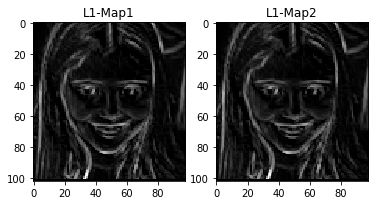

In [87]:
# Results after the Pooling
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(pool1[:,:,0],cmap=plt.get_cmap('gray'))
plt.title('L1-Map1')
f.add_subplot(1,2, 2)
plt.imshow(pool1[:,:,1],cmap=plt.get_cmap('gray'))
plt.title('L1-Map2')
plt.show(block=True)

### (6) Stacking layers

Adding the second layer to the previous network will be similar to apply the previous layer sequentially. For example, we can add a new layer called l2 whose filter will be $3 \times 5 \times 5$ (which has 3 filters). In this case, we will expects 3 feature maps from the conv layer, and the same for sucessive layers.

In [88]:
l2_filter = np.random.rand(3,5,5,pool1.shape[-1])

In [89]:
conv2 = conv(pool1, l2_filter)
relu2 = relu(conv2)
pool2 = pooling(relu2)

Filter  1
Filter  2
Filter  3


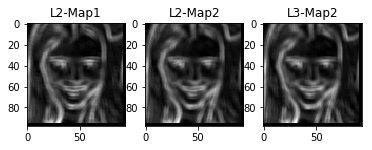

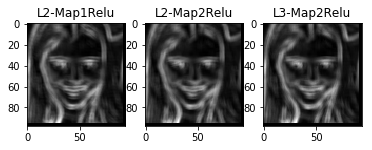

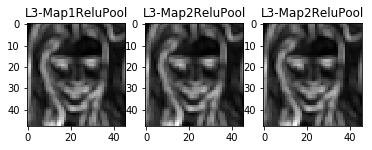

In [91]:
f = plt.figure()
f.add_subplot(1,3, 1)
plt.imshow(conv2[:,:,0],cmap=plt.get_cmap('gray'))
plt.title('L2-Map1')
f.add_subplot(1,3, 2)
plt.imshow(conv2[:,:,1],cmap=plt.get_cmap('gray'))
plt.title('L2-Map2')
f.add_subplot(1,3, 3)
plt.imshow(conv2[:,:,2],cmap=plt.get_cmap('gray'))
plt.title('L3-Map2')
plt.show(block=True)
f = plt.figure()
f.add_subplot(1,3, 1)
plt.imshow(relu2[:,:,0],cmap=plt.get_cmap('gray'))
plt.title('L2-Map1Relu')
f.add_subplot(1,3, 2)
plt.imshow(relu2[:,:,1],cmap=plt.get_cmap('gray'))
plt.title('L2-Map2Relu')
f.add_subplot(1,3, 3)
plt.imshow(relu2[:,:,2],cmap=plt.get_cmap('gray'))
plt.title('L3-Map2Relu')
plt.show(block=True)
f = plt.figure()
f.add_subplot(1,3, 1)
plt.imshow(pool2[:,:,0],cmap=plt.get_cmap('gray'))
plt.title('L3-Map1ReluPool')
f.add_subplot(1,3, 2)
plt.imshow(pool2[:,:,1],cmap=plt.get_cmap('gray'))
plt.title('L3-Map2ReluPool')
f.add_subplot(1,3, 3)
plt.imshow(pool2[:,:,2],cmap=plt.get_cmap('gray'))
plt.title('L3-Map2ReluPool')
plt.show(block=True)